In [2]:
%pylab inline
import numpy as np
from pymc3 import *

from theano.tensor.linalg import det, matrix_inverse

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


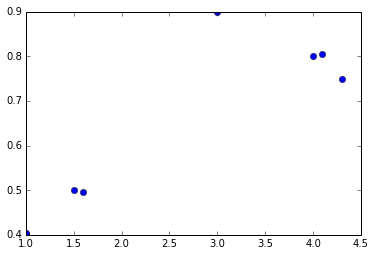

In [217]:
x0 = np.array([1,1,1,1.5,1.6, 3,4,4.1, 4.3])
y0 = np.array([.4,.401, .403, .5,.495, .9, .8, .805,.75])

nx = 50
xd = np.concatenate([x0, np.linspace(0,5, nx)])
yd = np.ma.masked_values(np.concatenate([y0, [-99] * nx]), value=-99)
plot(x0, y0, 'o');

In [78]:
def squared_exponential(x, y, eta2, rho2):
    return eta2 * exp(-rho2 * (x - y)**2)

class GaussianProcess(Continuous):
    def __init__(self, x, eta2, rho2, sigma2, *args, **kwargs):
        super(GaussianProcess, self).__init__(*args, **kwargs)
        self.mean = 0
        
        self.x = x
        self.eta2 = eta2
        self.rho2 = rho2
        self.sigma2 = sigma2
        
    def logp(self, y): 
        n = y.shape[0]
        
        S = squared_exponential(self.x[newaxis, :], self.x[:, newaxis], self.eta2, self.rho2)
        I = theano.tensor.eye(n, n)

        S = S +  I * self.sigma2
        
        return (
            n * log(2*pi) + log(det(S)) + 
            y.dot(matrix_inverse(S)).dot(y).sum()
        ) * -1/2.
        

In [218]:
        

with Model() as model: 
    eta2 = Exponential('eta2', 1/5.)
    rho2 = Exponential('rho2', 1/5.)
    sigma2 = .01**2 #Exponential('sigma2', 1/.01)
    
    y = GaussianProcess('y', x0, eta2, rho2, sigma2, observed=y0)

    

In [236]:
with model:
    step = NUTS()
    samples = sample(2000, step)
    

 [-----------------100%-----------------] 2000 of 2000 complete in 7.4 sec

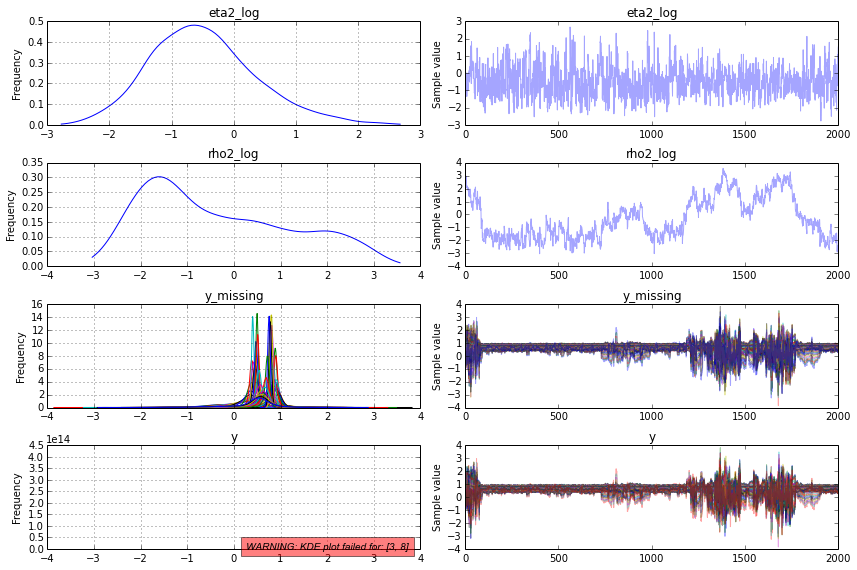

In [246]:
traceplot(trace0);

In [261]:

with Model() as model2: 
    eta2 = Exponential('eta2', 1/5.)
    rho2 = Exponential('rho2', 1/5.)
    sigma = Exponential('sigma', 1/.01)
    
    y = GaussianProcess('y', xd, eta2, rho2, sigma**2, observed=yd)


In [268]:
with model2:
    trace0 = sample(25, NUTS(), trace=model2.vars +[y])
    

 [-----------------48%                  ] 12 of 25 complete in 12.6 sec

LinAlgError: Singular matrix
Apply node that caused the error: MatrixInverse(Elemwise{Composite{((i0 * i1) + (i2 * i3))}}.0)
Inputs types: [TensorType(float64, matrix)]
Inputs shapes: [(59, 59)]
Inputs strides: [(472, 8)]
Inputs values: ['not shown']

Backtrace when the node is created:
  File "<ipython-input-78-ebc5efa690b9>", line 25, in logp
    ) * -1/2.

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [270]:
trace0[-1]

{'eta2_log': -0.62203208176399827,
 'rho2_log': 0.067911144846494687,
 'sigma_log': -4.0772634361075815,
 'y': array([ 0.4       ,  0.401     ,  0.403     ,  0.5       ,  0.495     ,
         0.9       ,  0.8       ,  0.805     ,  0.75      ,  0.91574083,
         0.80354935,  0.70688327,  0.56613181,  0.468852  ,  0.40446971,
         0.37207957,  0.37923413,  0.36653791,  0.38531848,  0.40802226,
         0.47326953,  0.47447206,  0.48577091,  0.52746352,  0.49721596,
         0.50091043,  0.49452206,  0.4653724 ,  0.45159965,  0.42319263,
         0.41567069,  0.43221196,  0.44004858,  0.44632459,  0.50466133,
         0.58007045,  0.64825248,  0.75343063,  0.84865108,  0.93101858,
         1.03437109,  1.06090367,  1.09026421,  1.07361255,  1.06784865,
         1.01832935,  0.9186748 ,  0.86386328,  0.83417256,  0.76718257,
         0.73559071,  0.71312845,  0.72693836,  0.71952567,  0.72291029,
         0.68966147,  0.63399565,  0.50874958,  0.34011407]),
 'y_missing': array([ 0.9

In [272]:
y.logp(trace0[-1])

array(121.70315536637884)

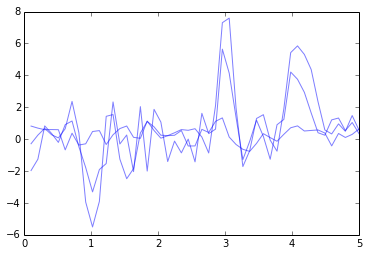

In [263]:
plot(xd[10:], trace0['y'].T[10:,::10], 'b-', alpha=.5);

In [259]:
with model2: 
    trace = sample(2000, NUTS(scaling=trace0[-1]), start=trace0[-1] trace=model2.vars + [y])

 [-----------------100%-----------------] 2000 of 2000 complete in 50.7 sec

[eta2_log, rho2_log, y_missing]

KeyError: 'sigma2_log'

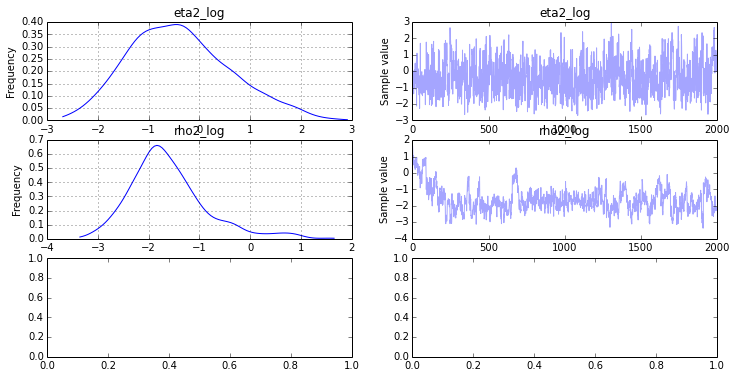

In [252]:
traceplot(trace, ['eta2_log', 'rho2_log', 'sigma2_log']);

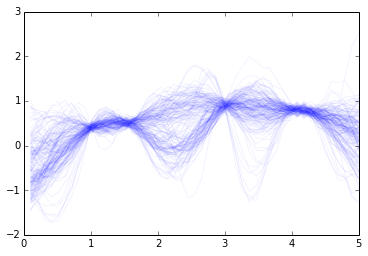

In [234]:
plot(xd[10:], trace0['y'].T[10:,:], 'b-', alpha=.05);

In [128]:
with model2:
    print Point(samples[-1])

{'sigma2_log': array(-5.162101296054978), 'eta2_log': array(-0.9530618320675909), 'rho2_log': array(-0.3630182567928828)}


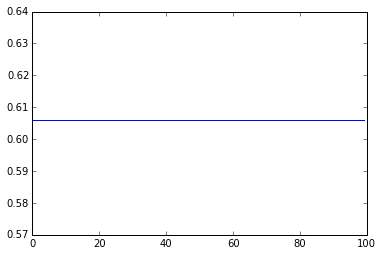

In [200]:
plot(start['y_missing'])

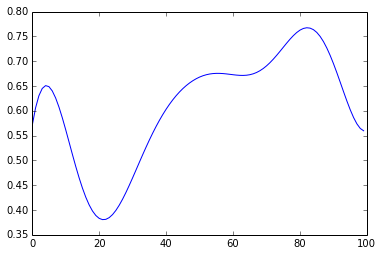

In [201]:
a = array([ 0.57012709,  0.60573935,  0.63038599,  0.64504615,  0.65078278,
        0.64871946,  0.64001681,  0.62584883,  0.60737997,  0.58574327,
        0.56202023,  0.53722274,  0.51227748,  0.48801311,  0.46515049,
        0.44429593,  0.42593772,  0.41044568,  0.39807367,  0.38896486,
        0.38315944,  0.38060438,  0.38116482,  0.38463677,  0.3907605 ,
        0.39923427,  0.40972788,  0.42189572,  0.43538885,  0.4498658 ,
        0.46500194,  0.4804971 ,  0.49608136,  0.51151911,  0.52661119,
        0.54119538,  0.55514541,  0.56836856,  0.5808023 ,  0.59241013,
        0.60317692,  0.61310411,  0.62220503,  0.63050056,  0.63801538,
        0.644775  ,  0.65080362,  0.65612299,  0.66075217,  0.66470817,
        0.6680074 ,  0.67066774,  0.67271104,  0.67416582,  0.67506996,
        0.67547319,  0.675439  ,  0.67504593,  0.67438799,  0.6735741 ,
        0.67272641,  0.67197764,  0.67146725,  0.67133675,  0.67172422,
        0.67275816,  0.67455108,  0.67719303,  0.68074537,  0.68523511,
        0.69065014,  0.69693563,  0.7039919 ,  0.71167386,  0.71979232,
        0.72811721,  0.73638263,  0.7442939 ,  0.75153622,  0.75778499,
        0.76271722,  0.76602409,  0.76742385,  0.76667496,  0.76358887,
        0.75804201,  0.74998658,  0.73945966,  0.7265903 ,  0.71160425,
        0.69482601,  0.67667813,  0.6576775 ,  0.63842873,  0.61961465,
        0.60198405,  0.58633705,  0.57350816,  0.56434778,  0.55970228])
plot(a)